# Use Human-in-the-Loop to Improve Your Data Science Copilot Results

### Free Generative AI Data Science Workshop

If you want to learn how to build AI Agents that perform Data Science, Business Intelligence, Churn Modeling, Time Series Forecasting, and more, [register for my next free AI for Data Scientists workshop here.](https://learn.business-science.io/ai-register)


# Table of Contents

1. [Introduction](#introduction)
2. [What is Human-in-the-Loop?](#what-is-human-in-the-loop)
3. [What is Data Science Copilot?](#what-is-data-science-copilot)
4. [Example: Using Human-in-the-Loop to Improve Data Science Copilot Results for Feature Engineering](#example-using-human-in-the-loop-to-improve-data-science-copilot-results-for-feature-engineering)
    1. [Load Libraries](#load-libraries)
    2. [Setup AI and Logging](#setup-ai-and-logging)
    3. [Load a Dataset](#load-a-dataset)
    4. [Create The Agent](#create-the-agent)
    5. [Invoke the Feature Engineering Agent with Human-In-The-Loop](#invoke-the-feature-engineering-agent-with-human-in-the-loop)
    6. [Human Review](#human-review)
    7. [Respond to eliminate conversion of Boolean values](#respond-to-eliminate-conversion-of-boolean-values)
    8. [Re-Review](#re-review)
    9. [Accept the modifications and proceed with the execution](#accept-the-modifications-and-proceed-with-the-execution)
5. [Free Generative AI Data Science Workshop](#free-generative-ai-data-science-workshop)

# Introduction

### What is Human-in-the-Loop?

Human-in-the-Loop is a concept where humans are involved in the decision-making process of AI models. The idea is that humans can provide feedback to AI models to improve their performance. This is especially useful in the case of AI models that are not perfect and need human intervention to improve their performance.

### What is Data Science Copilot (and how does Human-in-the-Loop Help)?

Data Science Copilot is a tool that helps data scientists write code faster and more efficiently. It is an AI-powered tool that provides code suggestions and auto-completion for data science tasks. Data Science Copilot can help data scientists complete common data science tasks faster.

**Human-in-the-Loop gives Data Scientists an opportunity to review the AI's plan before it executes code** to process the data or create machine learning models. This is important because the AI may not always provide the best suggestions, and human intervention can help improve the results.


## Example: Using Human-in-the-Loop to Improve Data Science Copilot Results for Feature Engineering

In this example, we will use Human-in-the-Loop to improve the results of Data Science Copilot for feature engineering. Feature engineering is an important step in the data science process, where we create new features and process existing features in data to improve the performance of machine learning models.

### Load Libraries

In [1]:
from langchain_openai import ChatOpenAI
from langgraph.types import Command

import os
import yaml
import pandas as pd
from pprint import pprint
from IPython.display import Markdown

from ai_data_science_team.agents import FeatureEngineeringAgent

### Setup AI and Logging

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [2]:
MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model = MODEL)
llm

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7fa528b1e3b0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7fa508898670>, root_client=<openai.OpenAI object at 0x7fa528b1eb30>, root_async_client=<openai.AsyncOpenAI object at 0x7fa528b1e3e0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/business-science/ai-data-science-team/refs/heads/master/data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Create The Agent

Run this code to create the agent with `FeatureEngineeringAgent()`.

**Important:** In this step we will set `human_in_the_loop=True` to enable human-in-the-loop. This will allow us to review the AI's plan before it executes the code.

Notice that the agent's graph now includes a new node called "Human Review". This node represents the step where the human reviews the AI's plan before it executes the code.

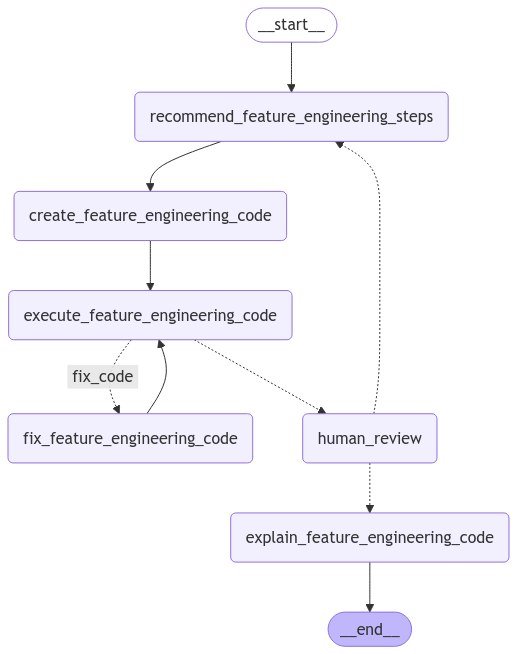

In [5]:
feature_engineering_agent = FeatureEngineeringAgent(
    model = llm, 
    log=LOG, 
    log_path=LOG_PATH, 
    human_in_the_loop=True,
)

feature_engineering_agent

### Invoke the Feature Engineering Agent with Human-In-The-Loop

In [6]:
# Invoke the Feature Engineering Agent with Human-In-The-Loop
config = {"configurable": {"thread_id": "1"}}

feature_engineering_agent.invoke_agent(
    user_instructions="Please perform feature engineering on the dataset.",
    target_variable="Churn",
    data_raw=df,
    max_retries=3,
    retry_count=0,
    config=config,
)

---FEATURE ENGINEERING AGENT----
    * RECOMMEND FEATURE ENGINEERING STEPS
    * CREATE FEATURE ENGINEERING CODE
      File saved to: /Users/mdancho/Desktop/course_code/ai-data-science-team/logs/feature_engineer.py
    * EXECUTING AGENT CODE
    * HUMAN REVIEW


The agent pauses at "HUMAN REVIEW" node. The agent is waiting for the human to provide the required information.

This is how to perform the review:

### Expose the AI's Plan from the interruped state

First, lets expose the AI's feature engineering plan by running the following code:

In [7]:
# Human Review
state = feature_engineering_agent._compiled_graph.get_state(config=config)

Markdown(state.tasks[-1].interrupts[-1].value)

Are the following feature engineering instructions correct? (Answer 'yes' or provide modifications)


# Recommended Feature Engineering Steps:
1. **Convert Data Types:**
   - Convert `TotalCharges` from object to numeric (float) since it contains numeric values.
   - Ensure all other numeric columns (`SeniorCitizen`, `tenure`, `MonthlyCharges`) are in the appropriate numeric types (int64 for integers and float64 for floats).

2. **Remove Unique Features:**
   - Remove the `customerID` column as it has unique values equal to the size of the dataset (7043).

3. **Remove Constant Features:**
   - Check for any constant features (with the same value across all rows) and remove them if present. 

4. **Handle High Cardinality Categorical Features:**
   - Identify high cardinality categorical features (e.g., `PaymentMethod` with 4 unique values) and apply an "other" category for infrequent values if they exceed 5% of the dataset.

5. **One-Hot Encoding for Categorical Variables:**
   - Apply One-Hot Encoding to the remaining categorical features (e.g., `gender`, `Partner`, `Dependents`, etc.) to convert them into a suitable format for modeling.

6. **Encoding Target Variable:**
   - Encode the `Churn` column using Label Encoding since it is a categorical target variable with two unique values.

7. **Convert Boolean Values:**
   - Convert any Boolean columns (like `SeniorCitizen`) to integer values (1/0) if not already done.

8. **Create Datetime Features:**
   - Since there are no datetime columns in the dataset, skip this step.

9. **Analyze for Additional Feature Engineering:**
   - Review the dataset for any potential additional feature engineering steps that could enhance model performance, such as creating interaction features or aggregating features. If none are found, state that no additional steps are required.

10. **Finalize the Feature Set:**
    - Review the final feature set for redundancy or any remaining transformations needed before proceeding to model training.

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: feature_engineering_agent
# Time Created: 2025-01-10 21:23:46

def feature_engineer(data_raw):
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder



    # Step 1: Convert Data Types
    data_raw['TotalCharges'] = pd.to_numeric(data_raw['TotalCharges'], errors='coerce')  # Convert to numeric
    numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
    data_raw[numeric_cols] = data_raw[numeric_cols].apply(pd.to_numeric, errors='coerce')

    # Step 2: Remove Unique Features
    data_raw.drop(columns=['customerID'], inplace=True)

    # Step 3: Remove Constant Features
    constant_features = data_raw.columns[data_raw.nunique() <= 1]
    data_raw.drop(columns=constant_features, inplace=True)

    # Step 4: Handle High Cardinality Categorical Features
    high_cardinality_features = ['PaymentMethod']
    for feature in high_cardinality_features:
        if (data_raw[feature].value_counts(normalize=True) < 0.05).any():
            other_category = data_raw[feature].value_counts()[data_raw[feature].value_counts() < 0.05].index
            data_raw[feature] = data_raw[feature].replace(other_category, 'Other')

    # Step 5: One-Hot Encoding for Categorical Variables
    categorical_features = data_raw.select_dtypes(include=['object']).columns.tolist()
    categorical_features.remove('Churn')  # Exclude target variable from this list
    data_encoded = pd.get_dummies(data_raw, columns=categorical_features, drop_first=True)

    # Step 6: Encoding Target Variable
    label_encoder = LabelEncoder()
    data_encoded['Churn'] = label_encoder.fit_transform(data_encoded['Churn'])

    # Step 7: Convert Boolean Values
    data_encoded['SeniorCitizen'] = data_encoded['SeniorCitizen'].astype(int)

    # Step 8: Create Datetime Features
    # Skipped as there are no datetime columns

    # Step 9: Analyze for Additional Feature Engineering
    # No additional steps are required as per the initial analysis

    # Step 10: Finalize the Feature Set
    # Check for any remaining transformations needed
    data_engineered = data_encoded.reset_index(drop=True)

    return data_engineered
```

Check the data post transformation by running the following code:

In [13]:
feature_engineering_agent.get_data_engineered()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,True,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,False,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


We can either respond "Yes" if the plan looks good or we can request modifications. If we respond "Yes" the agent will continue to execute the code. If we request modifications, the agent will go back to the recommend feature engineering steps node and revise the plan according to your instructions.

### Let's respond requesting to skip conversion of Boolean values to integers. 

We'll use `Command()` to `resume` the agent with our request to skip the conversion of Boolean values to integers.. 

In [ ]:
# Respond to eliminate coversion of Boolean values

feature_engineering_agent.invoke(Command(resume="Make sure to convert Boolean columns to integers. One hot encoded columns are being left as Boolean."), config=config)

The Feature Engineering Agent has went back to the "Recommend Feature Engineering Steps" node and revised the plan according to our instructions.

We can review the revised plan to make sure our request was implemented correctly.

In [17]:
# Re-Review: Now Booleans will not be converted
state = feature_engineering_agent._compiled_graph.get_state(config=config)
Markdown(state.tasks[-1].interrupts[-1].value)

Are the following feature engineering instructions correct? (Answer 'yes' or provide modifications)


# Recommended Feature Engineering Steps:
# Recommended Feature Engineering Steps:

1. **Convert Data Types:**
   - Convert `TotalCharges` from object to numeric (float) since it contains numeric values.

2. **Remove Unique Features:**
   - Remove the `customerID` column as it has unique values equal to the size of the dataset (7043).

3. **Remove Constant Features:**
   - Check for any constant features (with the same value across all rows) and remove them if present.

4. **Handle High Cardinality Categorical Features:**
   - Identify high cardinality categorical features and apply an "other" category for infrequent values if they exceed 5% of the dataset.

5. **One-Hot Encoding for Categorical Variables:**
   - Apply One-Hot Encoding to the remaining categorical features (e.g., `gender`, `Partner`, `Dependents`, etc.) to convert them into a suitable format for modeling. Note: One-Hot encoded columns will remain as Boolean.

6. **Encoding Target Variable:**
   - Encode the `Churn` column using Label Encoding since it is a categorical target variable with two unique values.

7. **Convert Boolean Values:**
   - Convert any Boolean columns (like `SeniorCitizen`) to integer values (1/0) if not already done. Note: This conversion will be done after one-hot encoding.

8. **Create Datetime Features:**
   - Since there are no datetime columns in the dataset, skip this step.

9. **Analyze for Additional Feature Engineering:**
   - Review the dataset for any potential additional feature engineering steps that could enhance model performance, such as creating interaction features or aggregating features. If none are found, state that no additional steps are required.

10. **Finalize the Feature Set:**
    - Review the final feature set for redundancy or any remaining transformations needed before proceeding to model training.

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: feature_engineering_agent
# Time Created: 2025-01-10 21:30:22

def feature_engineer(data_raw):
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder



    # Step 1: Convert Data Types
    data_raw['TotalCharges'] = pd.to_numeric(data_raw['TotalCharges'], errors='coerce')

    # Step 2: Remove Unique Features
    data_raw.drop(columns=['customerID'], inplace=True)

    # Step 3: Remove Constant Features
    constant_columns = [col for col in data_raw.columns if data_raw[col].nunique() == 1]
    data_raw.drop(columns=constant_columns, inplace=True)

    # Step 4: Handle High Cardinality Categorical Features
    high_cardinality_columns = data_raw.select_dtypes(include=['object']).columns
    
    for col in high_cardinality_columns:
        if (data_raw[col].value_counts(normalize=True).values[1] > 0.05):
            # Create 'Other' category for infrequent values
            top_values = data_raw[col].value_counts().nlargest(int(0.95 * len(data_raw))).index
            data_raw[col] = np.where(data_raw[col].isin(top_values), data_raw[col], 'Other')

    # Step 5: One-Hot Encoding for Categorical Variables
    categorical_features = data_raw.select_dtypes(include=['object']).columns
    ohe = OneHotEncoder(drop='first', sparse=False)
    ohe_result = ohe.fit_transform(data_raw[categorical_features])
    ohe_columns = ohe.get_feature_names_out(categorical_features)

    # Create a DataFrame for the One-Hot Encoded columns
    ohe_df = pd.DataFrame(ohe_result, columns=ohe_columns)
    data_raw = data_raw.drop(columns=categorical_features).reset_index(drop=True)
    data_raw = pd.concat([data_raw, ohe_df], axis=1)

    # Step 6: Ensure 'Churn' Column Exists Before Encoding
    if 'Churn' in data_raw.columns:
        label_encoder = LabelEncoder()
        data_raw['Churn'] = label_encoder.fit_transform(data_raw['Churn'])

    # Step 7: Convert Boolean Values
    if 'SeniorCitizen' in data_raw.columns:
        data_raw['SeniorCitizen'] = data_raw['SeniorCitizen'].astype(int)

    # Step 8: Skipped as there are no datetime columns

    # Step 9: Analyze for Additional Feature Engineering
    # No additional feature engineering steps are required based on the provided data analysis.

    # Step 10: Finalize the Feature Set
    return data_raw
```

Inspect the data post transformation by running the following code:

In [18]:
feature_engineering_agent.get_data_engineered()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,0,72,103.20,7362.90,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7040,0,11,29.60,346.45,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,1,4,74.40,306.60,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


We can see that the agent is now skipping the conversion of Boolean values to integers per user instructions.

### Accept the modifications and proceed with the explanation

In [ ]:
# Accept modifications to feature engineering instructions
feature_engineering_agent.invoke(Command(resume="Yes"), config=config)

In [20]:
feature_engineering_agent.get_data_engineered()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,0,72,103.20,7362.90,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7040,0,11,29.60,346.45,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,1,4,74.40,306.60,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [21]:
feature_engineering_agent.get_feature_engineer_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: feature_engineering_agent
# Time Created: 2025-01-10 21:30:22

def feature_engineer(data_raw):
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder



    # Step 1: Convert Data Types
    data_raw['TotalCharges'] = pd.to_numeric(data_raw['TotalCharges'], errors='coerce')

    # Step 2: Remove Unique Features
    data_raw.drop(columns=['customerID'], inplace=True)

    # Step 3: Remove Constant Features
    constant_columns = [col for col in data_raw.columns if data_raw[col].nunique() == 1]
    data_raw.drop(columns=constant_columns, inplace=True)

    # Step 4: Handle High Cardinality Categorical Features
    high_cardinality_columns = data_raw.select_dtypes(include=['object']).columns
    
    for col in high_cardinality_columns:
        if (data_raw[col].value_counts(normalize=True).values[1] > 0.05):
            # Create 'Other' category for infrequent values
            top_values = data_raw[col].value_counts().nlargest(int(0.95 * len(data_raw))).index
            data_raw[col] = np.where(data_raw[col].isin(top_values), data_raw[col], 'Other')

    # Step 5: One-Hot Encoding for Categorical Variables
    categorical_features = data_raw.select_dtypes(include=['object']).columns
    ohe = OneHotEncoder(drop='first', sparse=False)
    ohe_result = ohe.fit_transform(data_raw[categorical_features])
    ohe_columns = ohe.get_feature_names_out(categorical_features)

    # Create a DataFrame for the One-Hot Encoded columns
    ohe_df = pd.DataFrame(ohe_result, columns=ohe_columns)
    data_raw = data_raw.drop(columns=categorical_features).reset_index(drop=True)
    data_raw = pd.concat([data_raw, ohe_df], axis=1)

    # Step 6: Ensure 'Churn' Column Exists Before Encoding
    if 'Churn' in data_raw.columns:
        label_encoder = LabelEncoder()
        data_raw['Churn'] = label_encoder.fit_transform(data_raw['Churn'])

    # Step 7: Convert Boolean Values
    if 'SeniorCitizen' in data_raw.columns:
        data_raw['SeniorCitizen'] = data_raw['SeniorCitizen'].astype(int)

    # Step 8: Skipped as there are no datetime columns

    # Step 9: Analyze for Additional Feature Engineering
    # No additional feature engineering steps are required based on the provided data analysis.

    # Step 10: Finalize the Feature Set
    return data_raw
```

### Free Generative AI Data Science Workshop

If you want to learn how to build AI Agents that perform Data Science, Business Intelligence, Churn Modeling, Time Series Forecasting, and more, [register for my next free AI for Data Scientists workshop here.](https://learn.business-science.io/ai-register)